In [36]:
#Necessary libraries
import praw
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer    
from nltk.corpus import stopwords
import collections
import numpy as np
##nltk.download('stopwords')
set(stopwords.words('english'))
ps = PorterStemmer() 

In [37]:
#Id to scrape
my_client_id = "tlaYd7tsDOqvlQ"
my_client_secret = "xdRqwLkA07r8ScyJZTMsYUndrSA"
my_user_agent = "scrapping r/india"

In [38]:
#Helper function to print full panda data frame to analyze data
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    pd.set_option('display.max_colwidth', 950)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_colwidth')

In [39]:
# API to access reddit data
reddit = praw.Reddit(client_id=my_client_id, client_secret=my_client_secret, user_agent=my_user_agent)
india_subreddit = reddit.subreddit('India')

## Data Collection
<ul>
    <li>Getting TOP, HOT and NEW posts of reddit using the praw API </li>
    <li>Many JSON tags are retrived which may or may not be used in future </li>
    <li>https://github.com/reddit-archive/reddit/wiki/JSON used to study the tags </li>
    <li>This is done to get all the types of posts and not be trained on only one type. Also increases training data</li>
</ul>

In [40]:
top_posts = []
for post in india_subreddit.top(limit=1000):
    top_posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created,post.link_flair_text])

hot_posts = []
for post in india_subreddit.hot(limit=1000):
    hot_posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created,post.link_flair_text])

new_posts = []
for post in india_subreddit.new(limit=1000):
    new_posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created,post.link_flair_text])


## Exploratory Data Analysis

<ul>
    <li>Converting the data obtained into data frames for analyzing and combining the three types of data with duplicates removed</li>
    <li>Adding a text column that is title + body</li>
    <li>Removing NONE instances</li>
</ul>    

In [41]:
top_posts = pd.DataFrame(top_posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created','flare'])
hot_posts = pd.DataFrame(hot_posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created','flare'])
new_posts = pd.DataFrame(new_posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created','flare'])

frames = [top_posts, hot_posts, new_posts]
data = pd.concat(frames)
data.drop_duplicates(keep='last',inplace=True)
data['text'] = data['title'].str.cat(data['body'], sep =" ")
data = data.mask(data.eq('None')).dropna()
data.describe()

/Users/yatingupta/Github/Reddit-flare-detector/env/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,score,num_comments,created
count,2375.000000,2375.000000,2.375000e+03
mean,1144.744842,97.584421,1.573931e+09
std,1682.403534,232.345852,2.416684e+07
min,0.000000,0.000000,1.423102e+09
25%,17.000000,3.000000,1.570230e+09
50%,147.000000,28.000000,1.587183e+09
75%,1936.000000,133.000000,1.587326e+09
max,19710.000000,6913.000000,1.587471e+09


#### Here we analyze the division of count of posts in respective flares
This will tell how many and which flares are prominent

In [ ]:
data['flare'].value_counts()

In [ ]:
ax, fig = plt.subplots(figsize=(10, 7))
flare_class = data["flare"].value_counts()
flare_class.plot(kind= 'bar')
plt.title('Count of different flares')
plt.show()

### Analyzing the word cloud of the four main Flares - Coronavirus, non-political, politics, askindia
This is done to visualize which words are more used wrt flares

In [ ]:
from wordcloud import WordCloud
stop_words = stopwords.words("english")

Coronavirus = data[data["flare"] == "Coronavirus"]
Non_Political = data[data["flare"] == "Non-Political"]
Politics = data[data["flare"] == "Politics"]
AskIndia = data[data["flare"] == "AskIndia"]

Coronavirus_words = ''
Non_Political_words = ''
Politics_words = ''
AskIndia_words = ''

#Extracting words wrt flares

for t in Coronavirus.text:
    text = t.lower()
    tokens = word_tokenize(text)
    for w in tokens:
        Coronavirus_words = Coronavirus_words + w + ' '
        
for t in Non_Political.text:
    text = t.lower()
    tokens = word_tokenize(text)
    for w in tokens:
        Non_Political_words = Non_Political_words + w + ' '
        
for t in Politics.text:
    text = t.lower()
    tokens = word_tokenize(text)
    for w in tokens:
        Politics_words = Politics_words + w + ' '
        
for t in AskIndia.text:
    text = t.lower()
    tokens = word_tokenize(text)
    for w in tokens:
        AskIndia_words = AskIndia_words + w + ' '        


#### Coronavirus Wordcloud

In [ ]:
# Generate a word cloud image
wordcloud = WordCloud(width=600, height=400).generate(Coronavirus_words)
#Insincere Word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### Non-politcal Word Cloud

In [ ]:
# Generate a word cloud image
wordcloud = WordCloud(width=600, height=400).generate(Non_Political_words)
#Insincere Word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### Politics words Word Cloud

In [ ]:
# Generate a word cloud image
wordcloud = WordCloud(width=600, height=400).generate(Politics_words)
#Insincere Word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### Ask India words, Word Cloud

In [ ]:
# Generate a word cloud image
wordcloud = WordCloud(width=600, height=400).generate(AskIndia_words)
#Insincere Word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Comparison of length of posts and number of words used in different flare posts

In [ ]:
Coronavirus["post_length"] = Coronavirus.text.apply(lambda x: len(x))
Non_Political["post_length"] = Non_Political.text.apply(lambda x: len(x))

Coronavirus['number_words'] = Coronavirus.text.apply(lambda x: len(x.split()))
Non_Political['number_words'] = Non_Political.text.apply(lambda x: len(x.split()))

print("Mean Length of Coronavirus Posts " + str(Coronavirus["post_length"].mean()))
print("Mean Length of Non Political Posts "  + str(Non_Political["post_length"].mean()))
print("Mean word usage of Coronavirus Posts "  + str(Coronavirus['number_words'].mean()))
print("Mean word usage of Non Political Posts "  + str(Non_Political['number_words'].mean()))


## Building the Flare Detector

Helper Function to build confusion matrix

In [42]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

#### Helper Functions
<ul>
    <li>Preprocessing Textual data</li>
    <li>Encodes Target Variable</li>
    <li>Converts into TFIDF input texts</li>
    <li>Naive Bayes</li>
    <li>SVM</li>
    <li>Random Forest</li>
    <li>SGD</li>
    <li>Logistic Regression</li>
</ul>    

In [70]:
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

def preprocessing(data):
    emoji_pattern = re.compile("["
                       u"\U0001F600-\U0001F64F"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       u"\U00002702-\U000027B0"
                       u"\U000024C2-\U0001F251"
                       "]+", flags=re.UNICODE)

    data = (data.str.lower() #lowercase
                               .str.replace(r'[^\w\s]+', '') #rem punctuation 
                               .str.replace(emoji_pattern, '') #rem emoji
                               .str.replace(r'http\S+','') #rem links
                               .str.strip() #rem trailing whitespaces
                               .str.split()) #split by whitespaces

    res = []
    stop_words = set(stopwords.words('english')) 
    empty = ['removed','deleted','nan']
    
    #Removing stop words, empty words and stemming the words
    for i in data:
        t = ""
        for j in i:
            if j not in stop_words and j not in empty:
                w = ps.stem(j)
                t += w
                t += " "
        res.append(t)
    data = res
    return data

def encode(Y,train_y,test_y):
    encoder = LabelEncoder()
    Y = encoder.fit_transform(Y)
    train_y = encoder.transform(train_y)
    test_y = encoder.transform(test_y)
    return Y,train_y,test_y

def tfidf(X,train_x,test_x):
    Tfidf_vect = TfidfVectorizer()
    Tfidf_vect.fit(X)
    X = Tfidf_vect.transform(X)
    train_x = Tfidf_vect.transform(train_x)
    test_x = Tfidf_vect.transform(test_x)
    return X, train_x, test_x

def Naive_Bayes_Classifier(train_x,train_y,test_x,test_y):
    # fit the training dataset on the NB classifier
    Naive = naive_bayes.MultinomialNB()
    Naive.fit(train_x, train_y)
    # predict the labels on validation dataset
    predictions_NB = Naive.predict(test_x)
    print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, test_y)*100)
    
    return Naive

def SVM_Classifier(train_x,train_y,test_x,test_y):
    from sklearn import svm
    # fit the training dataset on the classifier
    SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
    SVM.fit(train_x,train_y)
    # predict the labels on validation dataset
    predictions_SVM = SVM.predict(test_x)
    
    print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, test_y)*100)
    return SVM

def Random_Forest_Classifier(train_x,train_y,test_x,test_y):
    from sklearn import ensemble
    random_forest_classfier = ensemble.RandomForestClassifier()
    random_forest_classfier.fit(train_x,train_y)
    predictions_RF = random_forest_classfier.predict(test_x)
    
    print("RF Accuracy Score -> ",accuracy_score(predictions_RF, test_y)*100)
    return random_forest_classfier

def SGD_Classifier(train_x,train_y,test_x,test_y):
    from sklearn.linear_model import SGDClassifier
    sgd = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
    sgd.fit(train_x,train_y)
    # predict the labels on validation dataset
    predictions_sgd = sgd.predict(test_x)
    print("SGD Accuracy Score -> ",accuracy_score(predictions_sgd, test_y)*100)
    return sgd

def Logistic_Regression_Classifier(train_x,train_y,test_x,test_y):
    from sklearn.linear_model import LogisticRegression
    Logistic_Regression = LogisticRegression(n_jobs=1, C=1e5,max_iter=2000)
    Logistic_Regression.fit(train_x,train_y)
    # predict the labels on validation dataset
    predictions_Logistic_Regression = Logistic_Regression.predict(test_x)
    print("Logistic_Regression Accuracy Score -> ",accuracy_score(predictions_Logistic_Regression, test_y)*100)
    return Logistic_Regression


# Part I
### Data Collection
<ul>
    <li> The required data here is extracted from data collected earlier </li>
    <li> The TOP, HOT and NEW posts are concatenated in frame </li>
    <li> duplicates are removed </li>
    <li>Creating a text column which concatenates the title and body text </li>
    <li>Since the number of flare was large (40), all the flares with less than 3 posts are deleted here to improve model performance </li>
    <li> ALL the rows with NONE data are removed </li>
</ul>    

In [126]:
top_text_flare_data = top_posts[['id','title','body','flare']]
hot_text_flare_data = hot_posts[['id','title','body','flare']]
new_text_flare_data = new_posts[['id','title','body','flare']]
frames = [top_text_flare_data, hot_text_flare_data, new_text_flare_data]
data = pd.concat(frames)

data.drop_duplicates(keep='last',inplace=True)
data['text'] = data['title'].str.cat(data['body'], sep =" ")
data = data.groupby('flare').filter(lambda x : len(x)>3)

data = data.mask(data.eq('None')).dropna()
data.describe()

,id,title,body,flare,text
count,1818,1818,1818,1818,1818
unique,1818,1805,316,15,1806
top,g3hcyn,Late Night Random Discussion Thread !,,Non-Political,Late Night Random Discussion Thread ! ^Beep ^B...
freq,1,4,1494,567,4


Preprocessing, splitting into training and test data.<br>
Encoding and vectorizing the data

In [124]:
data['text'] = preprocessing(data['text'])
# X = the entire text data , Y = entire target or flares
X = data['text']
Y = data['flare']

train_x, test_x, train_y, test_y = model_selection.train_test_split(X, Y,test_size=0.3)
Y,train_y,test_y = encode(Y,train_y,test_y)
X,train_x,test_x = tfidf(X,train_x,test_x)

### Calculating Accuracy of different ML algo

In [125]:
Naive = Naive_Bayes_Classifier(train_x, train_y, test_x, test_y)
SVM = SVM_Classifier(train_x, train_y, test_x, test_y)
Random_Forest = Random_Forest_Classifier(train_x, train_y, test_x, test_y)
SGD =  SGD_Classifier(train_x, train_y, test_x, test_y)
Logistic_Regression = Logistic_Regression_Classifier(train_x, train_y, test_x, test_y)

Naive Bayes Accuracy Score ->  49.26739926739927
SVM Accuracy Score ->  55.12820512820513
RF Accuracy Score ->  54.761904761904766
SGD Accuracy Score ->  57.509157509157504
Logistic_Regression Accuracy Score ->  53.84615384615385


#### Testing on Manual Examples
below example list is created on which the models will predict the flare

In [68]:
example_list = np.array(["Stuck in quarantine. Playing games all day","This. virus is killing me","Government of India needs to take action ","All the political ministers need to work for india"])
Example = pd.Series(example_list)
Example = (Example.str.lower() #lowercase
                           .str.replace(r'[^\w\s]+', '') #rem punctuation 
                           .str.replace(emoji_pattern, '') #rem emoji
                           .str.replace(r'http\S+','') #rem links
                           .str.strip() #rem trailing whitespaces
                           .str.split()) #split by whitespaces
res = []
stop_words = set(stopwords.words('english')) 

for i in Example:
    t = ""
    for j in i:
        if j not in stop_words:
            w = ps.stem(j)
            t += w
            t += " "
    res.append(t)
Example = res
Example_Tfidf = Tfidf_vect.transform(Example)

#### Building a confusion matrix to analyze the results from the best classifier yet (sgd) 

Normalized confusion matrix


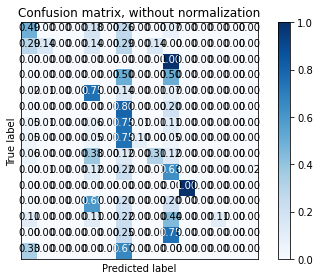

In [77]:
from sklearn.metrics import confusion_matrix
predictions_sgd = SGD.predict(test_x)
cm = confusion_matrix(test_y, predictions_sgd)
plt.figure()
plot_confusion_matrix(cm, classes=[],normalize=True,
                      title='Confusion matrix, without normalization')

# Part II
Since most of the cm is 0 or very less values here the dataset is reduced<br>
Now, only flares with greater than 100 posts are used.<br>
Data is already preprocessed here

In [131]:
data = data.groupby('flare').filter(lambda x : len(x)>100)

#### Data obtained above is divided into train,test and vectorized /encoded

In [132]:
# X = the entire text data , Y = entire target or flares
X = data['text']
Y = data['flare']

train_x, test_x, train_y, test_y = model_selection.train_test_split(X, Y,test_size=0.3)
Y,train_y,test_y = encode(Y,train_y,test_y)
X,train_x,test_x = tfidf(X,train_x,test_x)

#### Accuracy is measured from this data

In [133]:
Naive = Naive_Bayes_Classifier(train_x, train_y, test_x, test_y)
SVM = SVM_Classifier(train_x, train_y, test_x, test_y)
Random_Forest = Random_Forest_Classifier(train_x, train_y, test_x, test_y)
SGD =  SGD_Classifier(train_x, train_y, test_x, test_y)
Logistic_Regression = Logistic_Regression_Classifier(train_x, train_y, test_x, test_y)

Naive Bayes Accuracy Score ->  60.17699115044248
SVM Accuracy Score ->  62.16814159292036
RF Accuracy Score ->  56.63716814159292
SGD Accuracy Score ->  64.15929203539822
Logistic_Regression Accuracy Score ->  59.95575221238938


#### Data is oversampled
( Data used is already encoded and vectorized here )

In [134]:
from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
X, Y = smote.fit_resample(X, Y)
train_x, test_x, train_y, test_y = model_selection.train_test_split(X, Y,test_size=0.3)

#### Accuracy is measured from the oversampled data

In [135]:
Naive = Naive_Bayes_Classifier(train_x, train_y, test_x, test_y)
SVM = SVM_Classifier(train_x, train_y, test_x, test_y)
Random_Forest = Random_Forest_Classifier(train_x, train_y, test_x, test_y)
SGD =  SGD_Classifier(train_x, train_y, test_x, test_y)
Logistic_Regression = Logistic_Regression_Classifier(train_x, train_y, test_x, test_y)

Naive Bayes Accuracy Score ->  60.06944444444444
SVM Accuracy Score ->  76.5625
RF Accuracy Score ->  69.96527777777779
SGD Accuracy Score ->  74.47916666666666
Logistic_Regression Accuracy Score ->  73.4375


Normalized confusion matrix


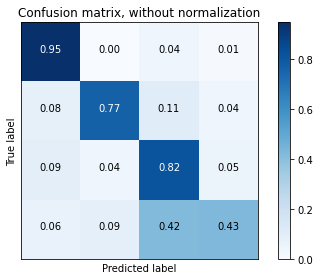

In [86]:
from sklearn.metrics import confusion_matrix
predictions_sgd = SGD.predict(test_x)
cm = confusion_matrix(test_y, predictions_sgd)
plt.figure()
plot_confusion_matrix(cm, classes=[],normalize=True,
                      title='Confusion matrix, without normalization')

### The confusion matrix indicates better values than previous one

# Part III
Using the Pushshift data, reddit r/india is scrapped for 2 years data.<br>
Here data is repeadtly scrapped in counts of 1000 posts from Jan 1 2018 to 10th April 2020.<br>
Calls to reddit API after every 1000 posts as that is the limit.<br>
This function takes a approx 10-20 minutes.<br>
Pandas dataframe is downloaded once the download finishes.<br>

In [20]:
import requests
import json
import datetime

def getPushshiftData(after, before, sub):
    url = 'https://api.pushshift.io/reddit/search/submission/?size=1000&after='+str(after)+'&before='+str(before)+'&subreddit='+str(sub)
    r = requests.get(url)
    data = json.loads(r.text)
    return data['data']

# This Function downloads data using pushshift API, from 'after' time to 'before' time, in 1000 posts iterations
# Then after the data is collected it is made into a pandas dataframe which is downloaded so that the function is not used again 
# since this function takes a lot of time to execute
def getData():
    
    subData = []
    subCount = 0
    #Subreddit to query
    sub='india'
    
    #before and after dates
    #unix time is provided
    after = "1514764800"  #January 1st 2018
    before = "1586476800" #10th April 2020

    data = getPushshiftData(after, before, sub)

    while len(data) > 0:
        for submission in data:
            try:
                flare = submission['link_flair_text']
            except KeyError:
                flare = None

            if flare == None:
                continue

            sub_id = submission['id']
            title = submission['title']
            try:
                selftext = submission['selftext']
            except KeyError:
                selftext = None

            subData.append([sub_id,title,selftext,flare])    
            subCount+=1
        print(str(datetime.datetime.fromtimestamp(data[-1]['created_utc'])),end = " ")
        #after every 1000 posts,after time is changed for API by using the last post extracted
        after = data[-1]['created_utc']
        data = getPushshiftData(after, before, sub)

    original_expanded_data = pd.DataFrame(subData,columns=['id', 'title', 'body', 'flare'])
    original_expanded_data.describe()
    original_expanded_data.to_pickle("original_expanded_data.pkl") 

### Analyzing the new expanded data flare count

In [88]:
expanded_data = pd.read_pickle("original_expanded_data.pkl")
expanded_data.drop_duplicates(keep='last',inplace=True)
expanded_data['text'] = expanded_data['title'].str.cat(expanded_data['body'], sep =" ")
expanded_data['flare'].value_counts()

Politics                                                  60969
Non-Political                                             59573
AskIndia                                                  33075
Business/Finance                                          13181
Science/Technology                                        10257
                                                          ...  
Not Related to India                                          1
| Witch-hunting/Targeting User |                              1
Low-effort Post.                                              1
Not in English. Removed                                       1
Personal Info. Unverified Content. TIL Rule Violation.        1
Name: flare, Length: 222, dtype: int64

### Filtering out the flares which have 3000 posts +
### seeing the count now

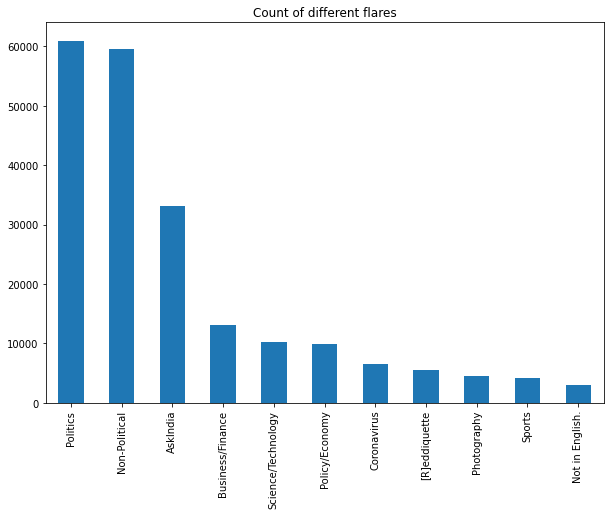

In [89]:
expanded_data = expanded_data.groupby('flare').filter(lambda x : len(x)>3000)
ax, fig = plt.subplots(figsize=(10, 7))
flare_class = expanded_data["flare"].value_counts()
flare_class.plot(kind= 'bar')
plt.title('Count of different flares')
plt.show()

#### Cleaning the collected data

In [137]:
expanded_data['text'] = preprocessing(expanded_data['text'])
expanded_data['flare'].value_counts()

#### Encoding/vectorizing the data

In [118]:
# X = the entire text data , Y = entire target or flares
X = expanded_data['text']
Y = expanded_data['flare']

train_x, test_x, train_y, test_y = model_selection.train_test_split(X, Y,test_size=0.3)
Y,train_y,test_y = encode(Y,train_y,test_y)
X,train_x,test_x = tfidf(X,train_x,test_x)

#### Undersampling the Data since some flares have much increased posts

In [119]:
from imblearn.under_sampling import RandomUnderSampler

print('Original dataset shape %s' % Counter(Y))
rus = RandomUnderSampler(random_state=42)
X, Y = rus.fit_resample(X, Y)
train_x, test_x, train_y, test_y = model_selection.train_test_split(X, Y,test_size=0.3)

print(Counter(Y_undersampled))

Original dataset shape Counter({7: 60904, 3: 59430, 0: 32861, 1: 13169, 8: 10245, 6: 9858, 2: 6563, 10: 5522, 5: 4545, 9: 4117, 4: 3031})
Counter({0: 3031, 1: 3031, 2: 3031, 3: 3031, 4: 3031, 5: 3031, 6: 3031, 7: 3031, 8: 3031, 9: 3031, 10: 3031})


### Getting Accuracy from this data
SVM and logistic regression are commented out since they take a lot of time to train

In [120]:
Naive = Naive_Bayes_Classifier(train_x, train_y, test_x, test_y)
Random_Forest = Random_Forest_Classifier(train_x, train_y, test_x, test_y)
SGD =  SGD_Classifier(train_x, train_y, test_x, test_y)
#SVM = SVM_Classifier(train_x, train_y, test_x, test_y)
#Logistic_Regression = Logistic_Regression_Classifier(train_x, train_y, test_x, test_y)

Naive Bayes Accuracy Score ->  54.343696890932726
RF Accuracy Score ->  53.58392482255323
SGD Accuracy Score ->  54.09377186843947


#### Although the accuracy have decreased, the model correctly predicts the sample examples

In [116]:
model = Naive
predict_example = model.predict(Example_Tfidf)
print(encoder.inverse_transform(predict_example))

ValueError: dimension mismatch

In [117]:
from sklearn.metrics import confusion_matrix
predictions_NB = Naive.predict(test_x)
cm = confusion_matrix(test_y, predictions_NB)

plt.figure()
plot_confusion_matrix(cm, classes=[],normalize=True,
                      title='Confusion matrix, without normalization')

ValueError: dimension mismatch

#### Below code will download the model, tfidf vectorizer and encoder to be directly used in Web App

In [29]:
import pickle
model = Naive
pickle.dump(model, open("model.pkl","wb"))
pickle.dump(Tfidf_vect, open("tfidf.pickle", "wb"))
np.save('classes.npy', encoder.classes_)

#### This is used to test the endpoint by sending request from test.txt

In [31]:
import requests

with open('test.txt', 'rb') as f:
    r = requests.post('https://reddit-flare-detector.herokuapp.com/automated_testing', files={'test.txt': f})
    a = r.json()
    print(a)

{'https://www.reddit.com/r/india/comments/fuug0q/ive_never_felt_so_helpless_please_help_our_family/?utm_medium=android_app&utm_source=share': 'Coronavirus', 'https://www.reddit.com/r/india/comments/fzobyi/anyone_else_sick_of_news_reporting_what/?utm_medium=android_app&utm_source=share': 'AskIndia', 'https://www.reddit.com/r/nextfuckinglevel/comments/g289tw/the_needle_galaxy_is_nearly_50_million_lightyears/': 'Science/Technology'}
